In [1]:
import scipy.stats as stats

# from statsmodels import api as sm # 절편추가를 위함
from statsmodels.formula.api import ols # 회귀분석
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from sklearn.feature_selection import RFE # 후진제거법

from statsmodels.tools.eval_measures import rmse

In [2]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# voting
from sklearn.ensemble import VotingClassifier
# bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# boosting
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# from sklearn.metrics import rmse
# from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
# from sklearn.metrics import roc_auc_score


# ---
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn import datasets

In [3]:
import missingno as msno
import pandas as pd
import numpy as np
import random
import seaborn as sns

# 한글 깨짐 해결
import matplotlib.pyplot as plt
import matplotlib as mpl

# 기본 세팅
mpl.rc("font", family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (12,10)
%matplotlib inline
sns.set()

In [4]:
iris = sns.load_dataset('iris')
encoder = LabelEncoder()
target = iris['species']
label = encoder.fit_transform(target)
data = iris.drop('species', axis=1)

# 군집

## Kmeans
- 각 클러스터에 할당된 데이터를 이용해 중심점을 반복적으로 업데이트하여 클러스터 형성
    - 1단계: 개별 포인트에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당<br>
    (거리 측정 방법: 유클리디안 거리, 맨하탄 거리)
    - 2단계: 할당된 클러스터를 기반으로 새로운 중심점을 계산함. 중심점은 클러스터 내부 점들 좌표의 산술평균이다.
    - 3단계: 각 클러스터의 할당이 바뀌지 않을 때까지 반복한다.

In [5]:
feature = pd.concat([iris.sepal_length, iris.sepal_width], axis=1)

In [6]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=2019)
kmeans.fit(feature)

KMeans(n_clusters=3, random_state=2019)

In [7]:
predict = kmeans.predict(feature)
predict = pd.DataFrame(predict, columns=['predict'])

In [8]:
result = pd.concat([feature, predict], axis=1)
result

,sepal_length,sepal_width,predict
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


In [9]:
centers = kmeans.cluster_centers_
centers

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

In [10]:
centers = pd.DataFrame(centers, columns=['sepal_lenght', 'sepal_width'])
centers

,sepal_lenght,sepal_width
0,6.812766,3.074468
1,5.006000,3.428000
2,5.773585,2.692453


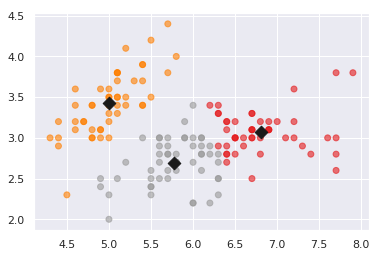

In [11]:
plt.scatter(result.sepal_length, result.sepal_width, c=result['predict'], alpha=0.6, cmap='Set1')
plt.scatter(centers.sepal_lenght, centers.sepal_width, s=80, marker='D', c='k')
plt.show()

###### Kmeans 결과 판단

In [12]:
# pd.crosstab(label, result['predict'])
pd.crosstab(target, result['predict'])

predict,0,1,2
species,,,
setosa,0,50,0
versicolor,12,0,38
virginica,35,0,15


## scaling 후에 결과는 어떻게 다른가?

In [13]:
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, model)

In [14]:
pipeline.fit(feature)
pred_std_scaled = pipeline.predict(feature)
pred_std_scaled_df = pd.DataFrame(pred_std_scaled, columns=['predict'])

In [15]:
result_std_scaled = pd.concat([feature, pred_std_scaled_df], axis=1)
result_std_scaled.head()

,sepal_length,sepal_width,predict
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


In [16]:
pd.crosstab(target, result_std_scaled.predict)

predict,0,1,2
species,,,
setosa,1,0,49
versicolor,36,13,1
virginica,20,30,0


In [17]:
feature_scaled = scaler.fit_transform(feature)
kmeans_scaled = KMeans(n_clusters=3, max_iter=300, random_state=2019)

kmeans_scaled.fit(feature_scaled)
pred_scaled = kmeans_scaled.predict(feature_scaled)

In [18]:
centers_scaled = kmeans_scaled.cluster_centers_
centers_scaled

array([[-0.04825457, -0.89526349],
       [-0.97822861,  0.90390597],
       [ 1.20144049,  0.13569118]])

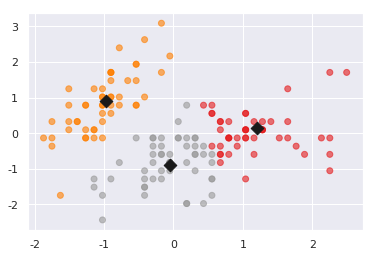

In [19]:
plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=result['predict'], alpha=0.6, cmap='Set1')
plt.scatter(centers_scaled[:, 0], centers_scaled[:, 1], s=80, marker='D', c='k')
plt.show()

In [20]:
# scale 안했을 떄
pd.crosstab(target, result['predict'])

predict,0,1,2
species,,,
setosa,0,50,0
versicolor,12,0,38
virginica,35,0,15


In [21]:
# scale 했을 때
pd.crosstab(target, result_std_scaled['predict'])

predict,0,1,2
species,,,
setosa,1,0,49
versicolor,36,13,1
virginica,20,30,0


#### 실루엣 계수
- 실루엣 계수는 -1 에서 1사이의 값을 갖음
- 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져 있다는 의미
- 0에 가까울 수록 근처의 군집과 가까워 진다는 의미
- -1은 다른 군집에 할당됐다는 의미

# kmeans : scaled vs not scaled

In [22]:
score = silhouette_score(feature, result_std_scaled.predict)
score

0.433316197004957

In [23]:
score = silhouette_score(feature, result.predict)
score

0.4450525692083638

In [24]:
score_scaled = silhouette_score(feature_scaled, result_std_scaled.predict)
score_scaled

0.4388714429939777

##### 적합한 n_clusters 찾기

In [25]:
ks = range(1, 10)
inertia_list = [] # 뭔뜻이지..

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertia_list.append(model.inertia_)

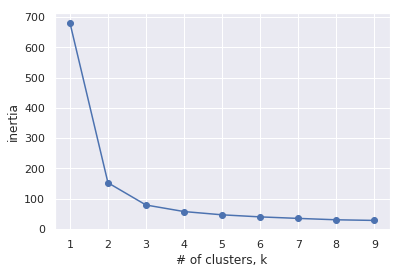

In [26]:
plt.plot(ks, inertia_list, '-o')
plt.xlabel('# of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [27]:
from scipy.cluster.hierarchy import dendrogram, ward

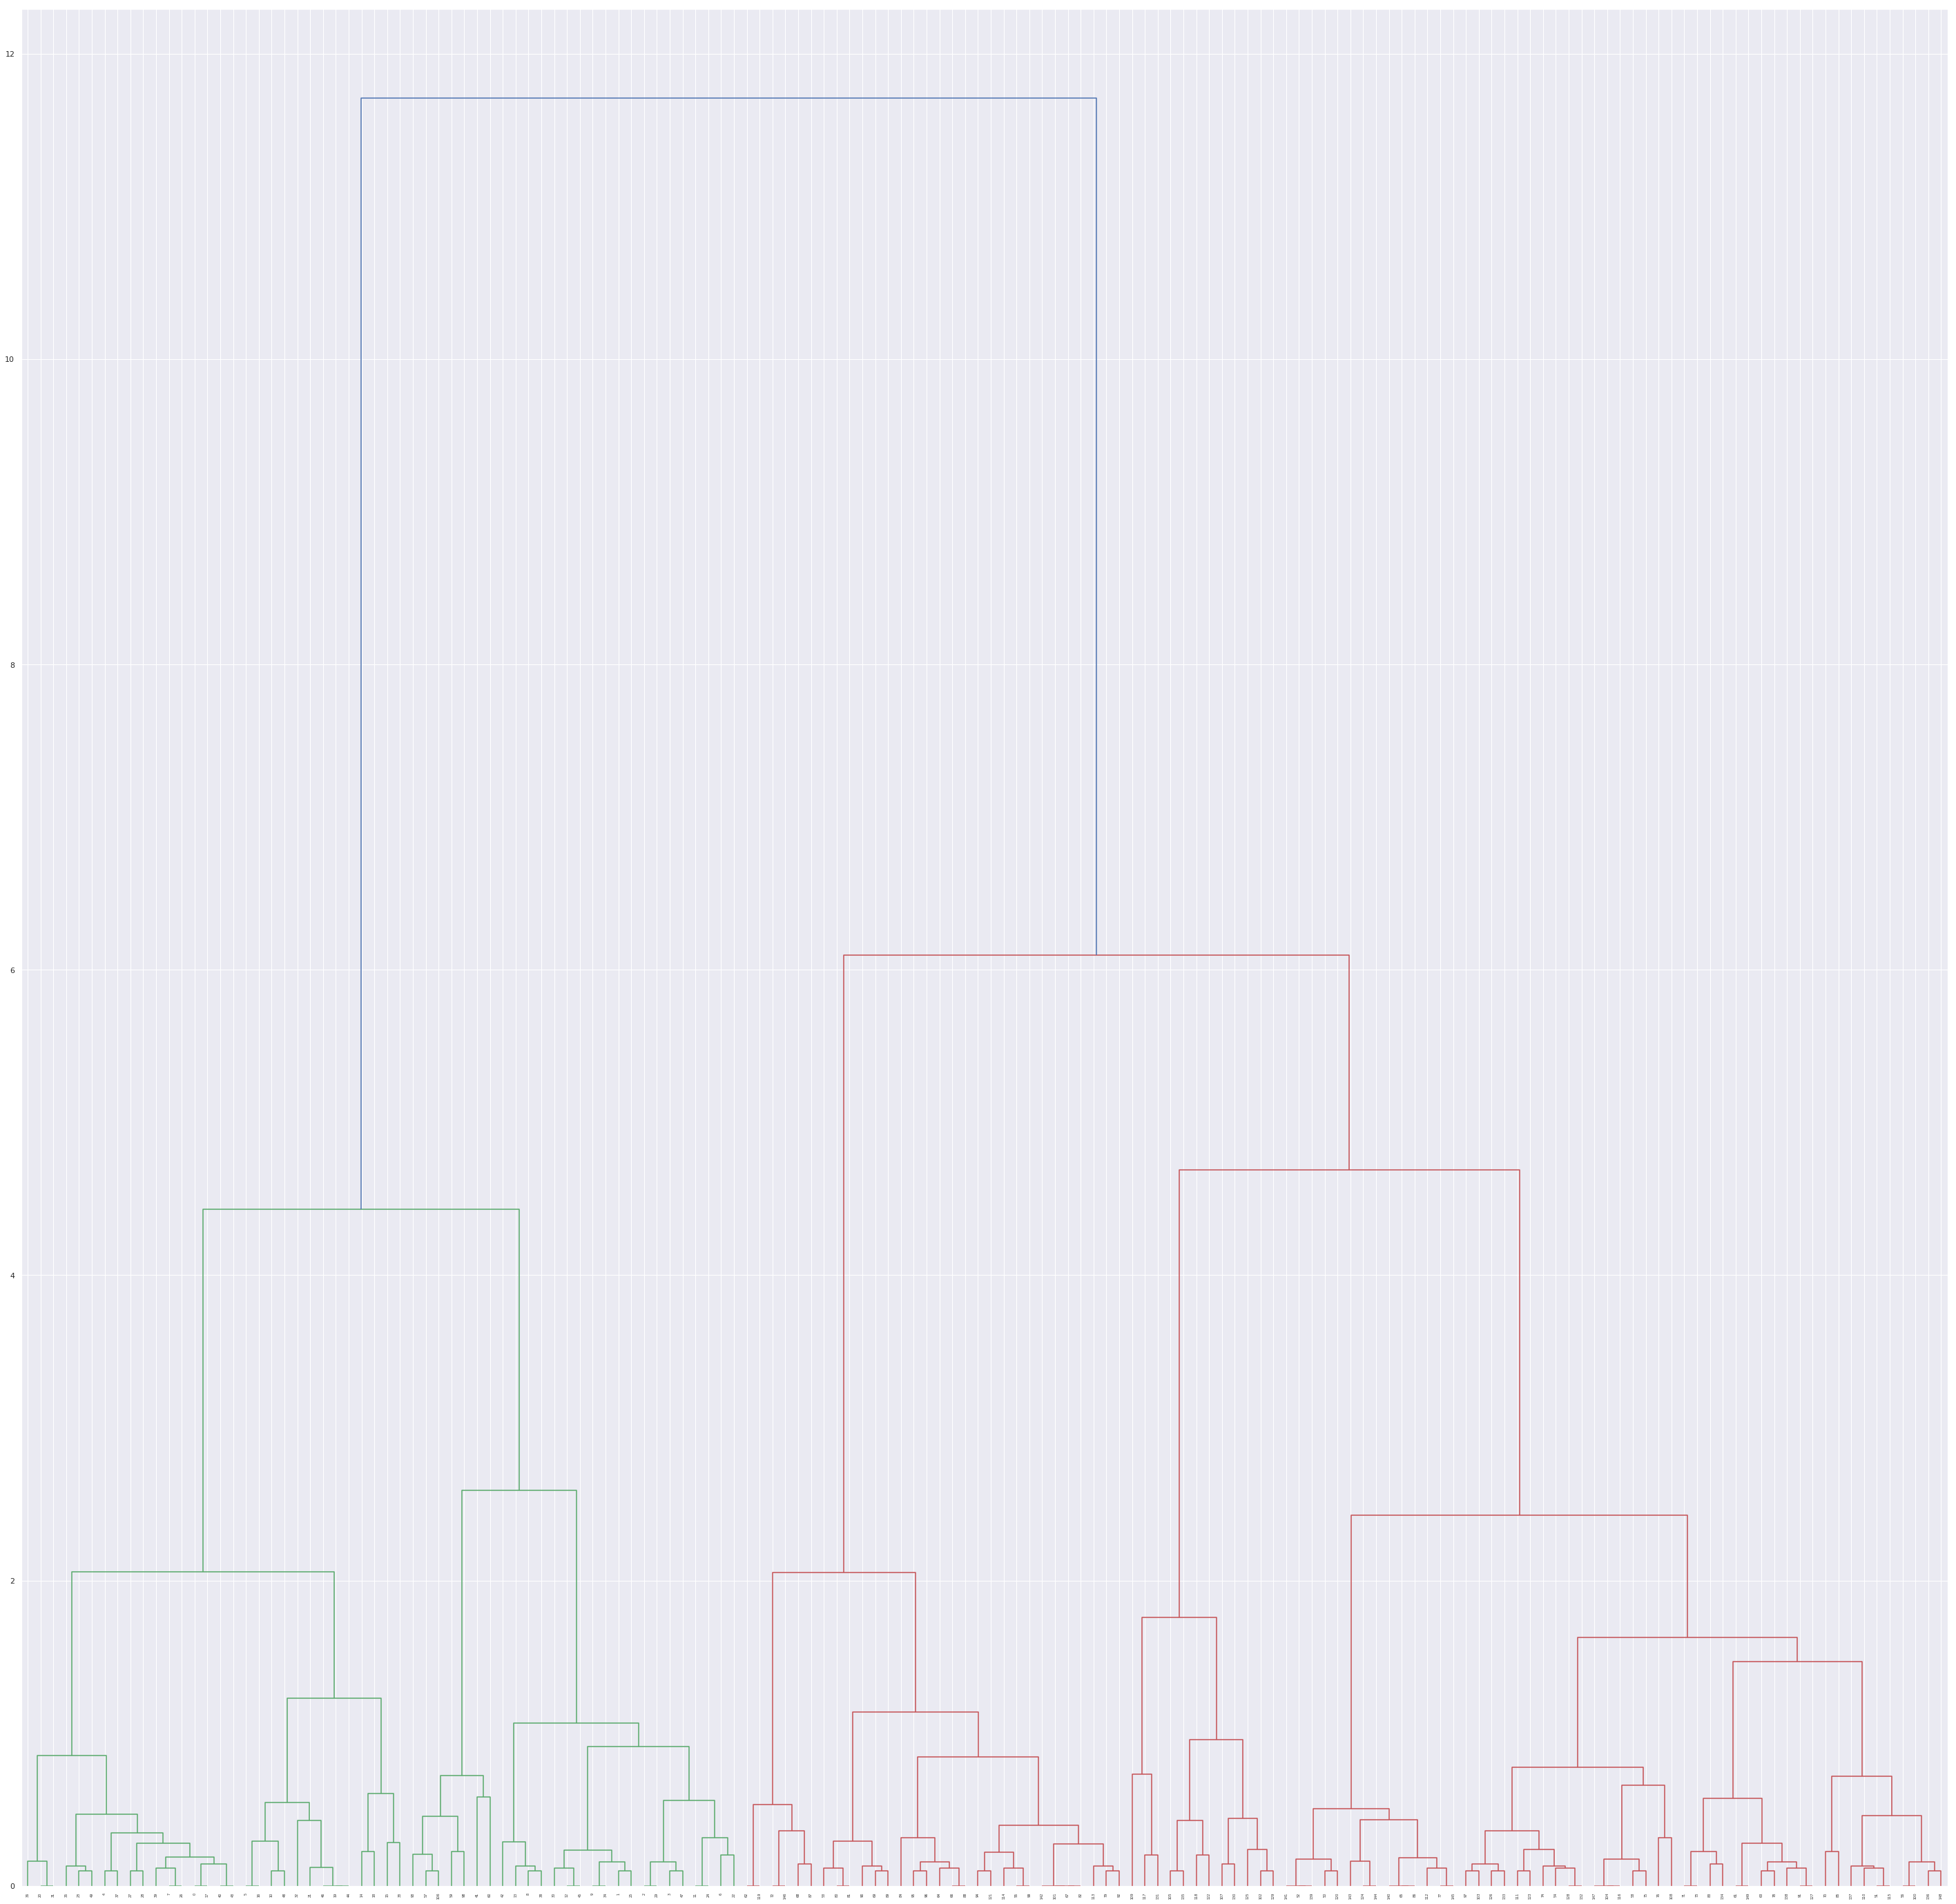

In [28]:
linkage_array = ward(feature)
plt.figure(figsize=(50, 50))
dendrogram(linkage_array)
plt.show()

# 회귀분석

- 가정
    - 정규성: 각 자료는 정규분포를 따른다.
    - 독립성: 각 자료는 서로 독립적이다.
    - 등분산: 잔차의 분산이 일정하다.

- 장점
    - 가장 많이 사용됨
    - 이해 및 해석이 용이. 결과에 대한 근거, 이유 활용방안 등 유용한 정보를 얻을 수 있음
    - 목표 변수와 관련 없는 설명 변수를 선택 또는 제거하는 방법 제공
        - 전진선택법
        - 후진제거법
        
- 단점
    - 비선형 관계를 확인하기 위한 적절한 기준이 없음
    - 결측치는 분석에서 무조건 제외됨. 알고리즘에서 내부적으로 자동으로 제외
    - 결측 발생 원인 확인을 통해 적절한 사전 대체 작업 필요

## 선형회귀
- 키워드
    - VIF(분산팽창계수)
        - 독립변수들 사이에서 상관관계를 갖는 현상
    - 결정계수($R^2$, R-squared)
        - 회귀식이 얾나나 실제 데이터를 설명하는지를 나타는 값
        - predictor가 많아지면 결정계수 값은 커짐
        
    - 수정결정계수($adjusted R^2$)
        
    - 공분산
        - 두 변수가 독립일 때, 공분산 값은 0
        - 0이라고 해서 독립은 아님
    - 잔차
        - 실제값($y$)과 예측값($\hat{y}$)의 차이 : $y_i - \hat{y}$

### 단순선형회귀
- $y = \beta_0 + \beta_1 x + \epsilon$
    - $\beta_0$: 절편. 모델이 y축을 통과하는점
    - $\beta_1$: 모델의 기울기. x가 한 단위 증가에 따른 y의 변화폭
    
- 모델 검정은 t-test

- 오차항(${\epsilon}$)의 필요조건
    - 오차항: 모델의 오차
    - $\epsilon$ ~ $N(0, \sigma)$
    - 오차항은 독립
    
- 분석절차
    - 경향성 확인
        - 산점도
        - 상관분석: 변수간 선형적 관계가 있는지 분석. 상관계수(corr)로 확인
            - corr 가 1에 가까울수록 양의 상관관계
            - corr 가 -1에 가까울수록 음의 상관관계
    - 모델의 적합성 확인
        - 추정된 표준오차 확인
        - 결정계수로 설명력 확인
        - ANOVA 분석결과 확인 - 모델 유형의 적합성. F-test
    - 회귀계수 계산
    - 오차(잔차)의 가정 확인 (오차의 정규성, 오차의 등분산성, 오차의 독립성)
    - 모델 선정
    
    
- 최소자승법
    - 잔차의 제곱합(SSE, Sum of Squred Error)이 최소가 되도록 하는 최적의 회귀식을 구하는 방법

In [29]:
data_x = np.arange(20)
data_y = data_x*2 + np.random.uniform(-2, 2, 20)

In [30]:
df = pd.DataFrame({'UNITS':data_x, "MINUTES":data_y})
df.head()

,UNITS,MINUTES
0,0,-0.846017
1,1,1.910778
2,2,2.879960
3,3,7.245972
4,4,7.367035


### 경향성 확인

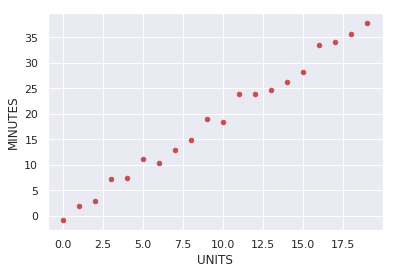

In [31]:
df.plot.scatter(x='UNITS', y='MINUTES', c='r')

In [32]:
df.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.995
MINUTES,0.995,1.000


In [33]:
# y ~ x1
# 상수항 안들어감
reg_model = ols('MINUTES ~ UNITS', data=df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1819.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.55e-19
Time:                        23:04:15   Log-Likelihood:                -31.125
No. Observations:                  20   AIC:                             66.25
Df Residuals:                      18   BIC:                             68.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3519      0.521     -0.675      0.5

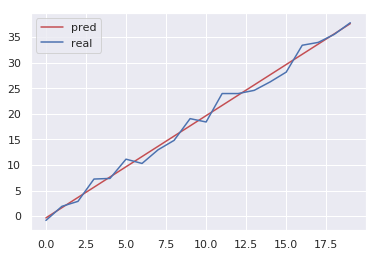

In [34]:
pred = reg_result.predict(df['UNITS'])
plt.plot(pred, c='r', label='pred')
plt.plot(df['MINUTES'], label='real')
plt.legend()

In [35]:
df.loc[0, 'MINUTES'] - pred[0]

-0.4941252680187418

#### 잔차의 정규성
- 0을 기준으로 산포됨

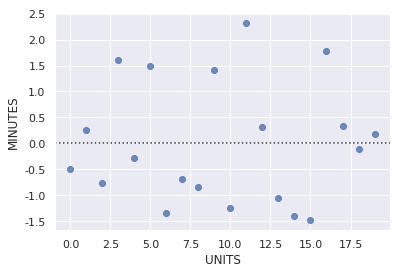

In [36]:
sns.residplot('UNITS', 'MINUTES', df)

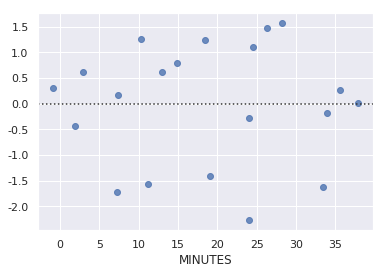

In [37]:
obs = reg_result.resid.values
z = (obs - np.mean(obs))/np.std(obs)
sns.residplot(df['MINUTES'], pred)

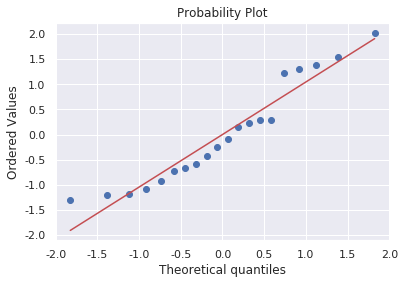

In [38]:
stats.probplot(z, dist='norm', plot=plt);

### 다중선형회귀(다변량 선형회귀)
- 모델 검정은 F-test

In [39]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


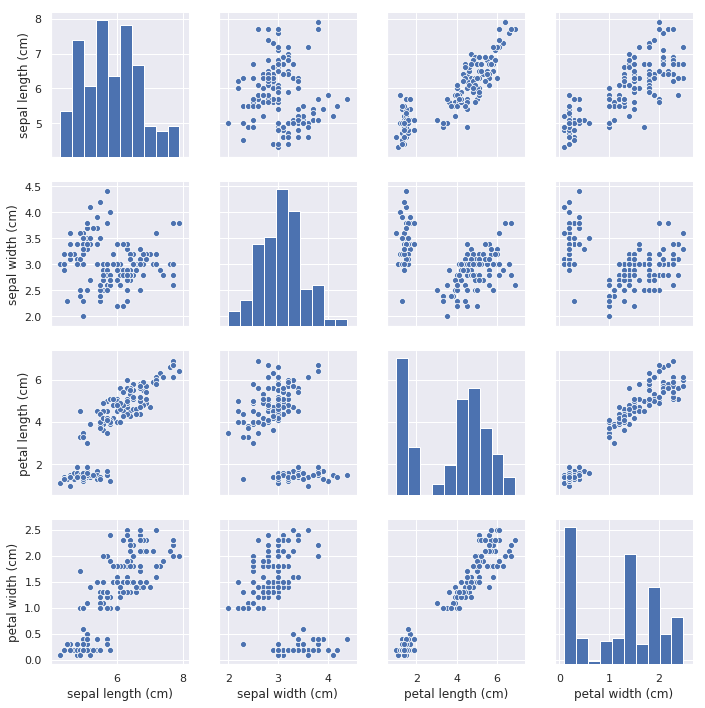

In [40]:
sns.pairplot(df)

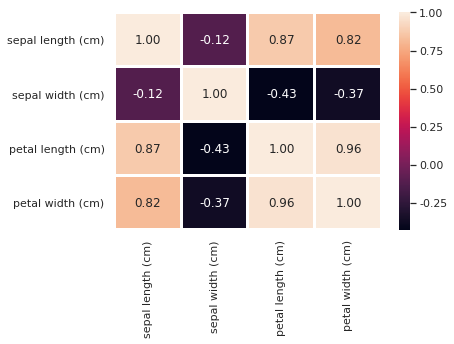

In [41]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

In [42]:
x_columns = list(df.columns)
x_columns = list(map(lambda x: '_'.join(x.split(' ')[:-1]), x_columns))
x_columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [43]:
df.columns = x_columns

In [44]:
reg_multi_model = ols("sepal_length ~ sepal_width + petal_length + petal_width", data=df)
reg_multi_result = reg_multi_model.fit()
print(reg_multi_result.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           8.59e-62
Time:                        23:04:18   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8560      0.251      7.401   

## skleanrn에서 선형회귀

#### 선형회귀

In [45]:
boston = datasets.load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
data = pd.DataFrame(data, columns=boston.feature_names)
target = raw_df.values[1::2, 2]

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2019)

#### LinearRegression.fit 할 때, shape 확인 -> ( X_shape(n, 1), y_shape(1, ))



In [47]:
linear = LinearRegression()
linear.fit(X_train.RM.values.reshape(-1, 1), y_train)
pred = linear.predict(X_test.RM.values.reshape(-1, 1))

In [48]:
linear.coef_

array([9.99002801])

In [49]:
linear.intercept_

-40.09405957693414

In [50]:
r2_score(y_test, pred)

0.17951289214833988

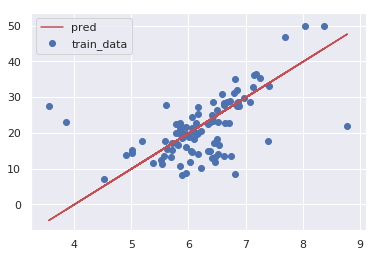

In [51]:
plt.plot(X_test.RM.values, pred, 'r', label='pred')
plt.scatter(X_test.RM.values, y_test, label='train_data')
plt.legend()
plt.show()

#### 다중선형회귀

In [52]:
multi = LinearRegression()
multi.fit(X_train, y_train)
pred = multi.predict(X_test)

In [53]:
multi.coef_

array([-1.39521123e-01,  4.17817156e-02, -4.57312740e-03,  3.78506106e+00,
       -1.46255552e+01,  4.52548061e+00,  1.49683102e-04, -1.38217694e+00,
        2.78132923e-01, -1.03183306e-02, -8.42539713e-01,  1.05460752e-02,
       -5.19900681e-01])

In [54]:
multi.intercept_

27.275312340930476

In [55]:
r2_score(y_test, pred)

0.6174065999127871

# sklearn에서 로지스틱 회귀

In [56]:
iris = sns.load_dataset('iris')
encoder = LabelEncoder()
label = encoder.fit_transform(iris.species)
label = pd.DataFrame(label, columns=['label'])
data = iris.drop('species', axis=1)

In [57]:
# shuffle=False 일 때, stratify 안됨
X_train, X_test, y_train, y_test = train_test_split(data, label, shuffle=True, stratify=label,  test_size=0.2, random_state=2019)

In [58]:
y_train.value_counts()

label
2        40
1        40
0        40
dtype: int64

In [59]:
lr_reg = LogisticRegression(max_iter=2000, ) # multi_class='multinomial'
lr_reg.fit(X_train.values, y_train.values.ravel())
pred = lr_reg.predict(X_test.values)

In [60]:
cfs = confusion_matrix(y_test, pred)
cfs

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [61]:
accuracy_score(pred, y_test)

0.9666666666666667

In [62]:
# precision_score(pred, y_test, average='macro')

In [63]:
# recall_score(pred, y_test)

### 다항선형회귀(비선형회귀)

## 로지스틱회귀
- 모델 검정은 ${\chi}^2$ test

# DT regression

In [184]:
boston = datasets.load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
target = boston.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2019)

In [65]:
from sklearn.tree import DecisionTreeRegressor
# input shape 조심
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train.RM.values.reshape(-1, 1), y_train.reshape(-1, 1))
pred = dtr.predict(X_test.RM.values.reshape(-1, 1))

In [66]:
r2_score(y_test, pred)

0.42035972520134635

In [67]:
# 데이터 정렬 조심
sort_data = pd.concat([X_test.RM.reset_index(drop=True), pd.Series(y_test)], axis=1)
sort_data = sort_data.sort_values('RM')

In [68]:
pred = dtr.predict(sort_data.RM.values.reshape(-1, 1))

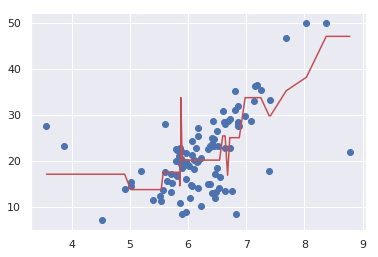

In [69]:
plt.scatter(X_test.RM.values, y_test)
plt.plot(X_test.RM.sort_values().values, pred, 'r')
plt.show()

In [70]:
# sorting 전으로 스코어 봐야함
pred = dtr.predict(X_test.RM.values.reshape(-1, 1))
r2_score(y_test, pred)

0.42035972520134635

# SVC

In [71]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris['target']

In [72]:
# # 커널 linear, poly, RBF, Hyper-tangent
# svc = SVC()
# svc.fit()

# SVR

In [73]:
svr = SVR()
svr.fit(X_train.RM.values.reshape(-1, 1), y_train)

SVR()

In [74]:
pred = svr.predict(X_test.RM.values.reshape(-1, 1))
r2_score(y_test, pred)

0.49200817004457187

In [75]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['y_test']
# y_test

In [76]:
X_test_rm = X_test.RM
X_test_rm = X_test_rm.reset_index(drop=True)

In [77]:
concat_df = pd.concat([X_test_rm, y_test], axis=1)
concat_df = concat_df.sort_values('RM')

In [78]:
pred_sort = svr.predict(concat_df.RM.values.reshape(-1, 1))

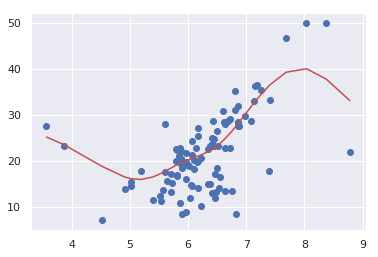

In [79]:
plt.scatter(X_test.RM, y_test)
plt.plot(concat_df.RM.values, pred_sort, 'r')
plt.show()

In [80]:
svr2 = SVR()
svr2.fit(X_train, y_train)

SVR()

In [81]:
pred = svr2.predict(X_test)

In [82]:
r2_score(y_test, pred)

0.2569479249369293

## iris data

In [186]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
target_names_df = pd.DataFrame(data=iris.target_names, columns=['target_names'])
df = pd.merge(df, target_names_df, left_on='target', right_index=True)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


# Missing value

## 결측치 확인 및 제거

### 결측치 예시 생성

In [84]:
data = df.copy()
sample = df.sample(n=10).index
data.iloc[sample, :2] = np.nan

data.isna().sum()
# droped_df.isnll().sum()

sepal length (cm)    10
sepal width (cm)     10
petal length (cm)     0
petal width (cm)      0
target                0
target_names          0
dtype: int64

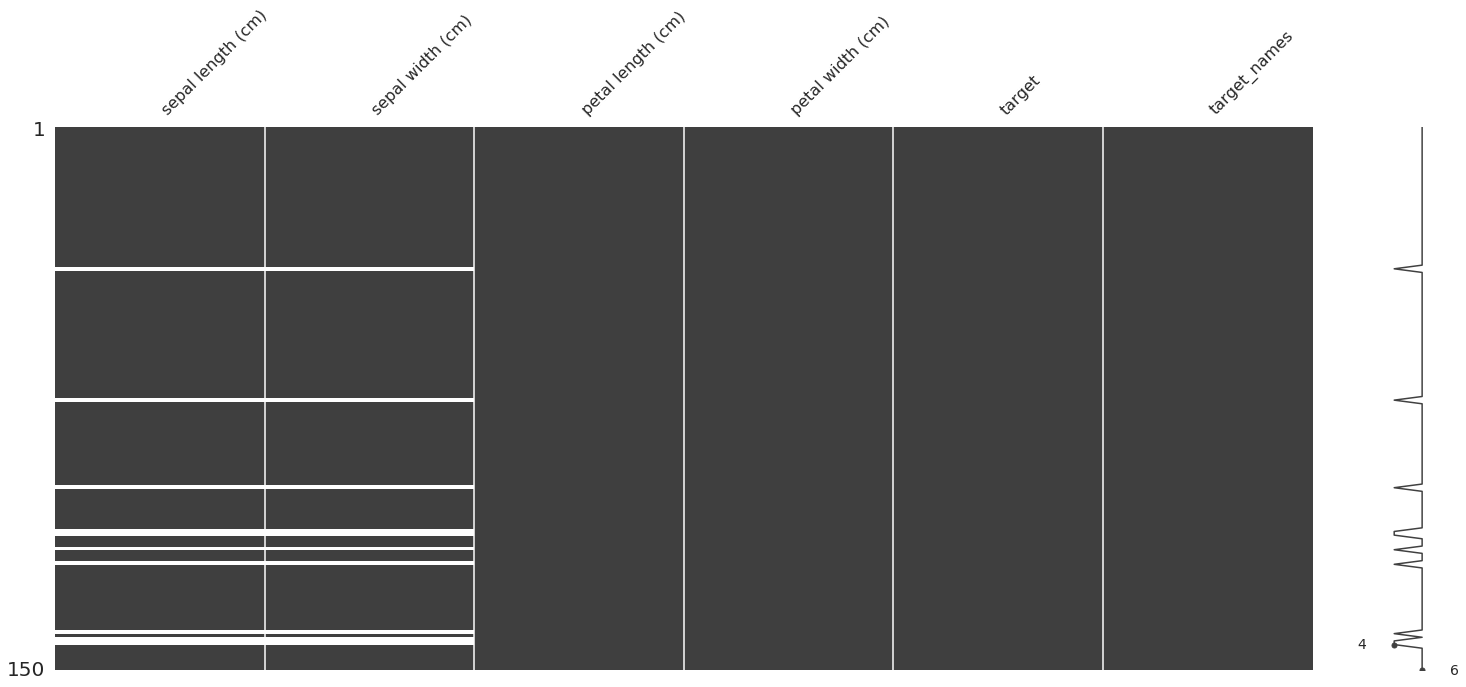

In [85]:
msno.matrix(data)

In [86]:
# msno.bar(data);
# plt.show()

## 행 기준 결측치를 제외한 열 개수 기준으로 행 제거

In [87]:
# 행을 기준으로 결측치를 제외한 나머지 열의 개수가 thresh 보다 많지 않으면 drop
droped_df = data.dropna(thresh=5)
droped_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

## 열 기준 결측치를 제외한 행 개수 기준으로 경우 열 제거

### 결측치 예시 생성

In [88]:
data2 = df.copy()
sample = df.sample(n=80).index
data2.iloc[sample, [1,3]] = np.nan

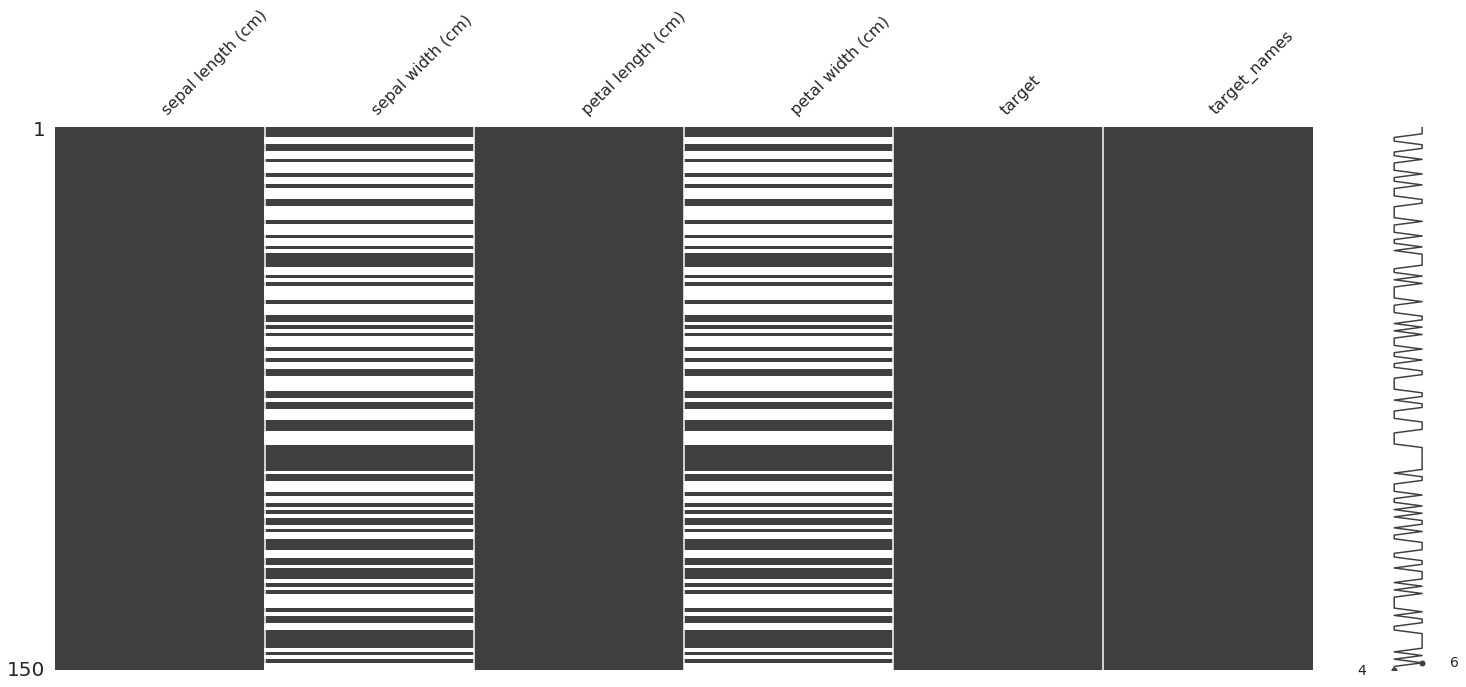

In [89]:
msno.matrix(data2)

In [90]:
data2.isna().sum()

sepal length (cm)     0
sepal width (cm)     80
petal length (cm)     0
petal width (cm)     80
target                0
target_names          0
dtype: int64

In [91]:
# 열 기준 결측치를 제외한 데이터 수가 thresh 보다 많지 않으면 해당 열 drop
rmed = data2.dropna(thresh=80, axis=1)
rmed.isna().sum()

sepal length (cm)    0
petal length (cm)    0
target               0
target_names         0
dtype: int64

## 결측치 대체

- 결측치를 포함하고 있는 열이 다른 열과 상관관계가 낮을 때 사용한다.

#### 결측 데이터 생성

In [92]:
ctgr = [1,2,3,4,5] * 30
random.shuffle(ctgr)

ctns = np.random.normal(10, 1.5, 150)

data3 = df.copy()
data3['continuous_var'] = ctns
data3['categorical_var'] = ctgr

sample = data3.sample(n=10).index
data3.iloc[sample, 6:] = np.nan

data3.isna().sum()

sepal length (cm)     0
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
target                0
target_names          0
continuous_var       10
categorical_var      10
dtype: int64

### 상관관계 확인

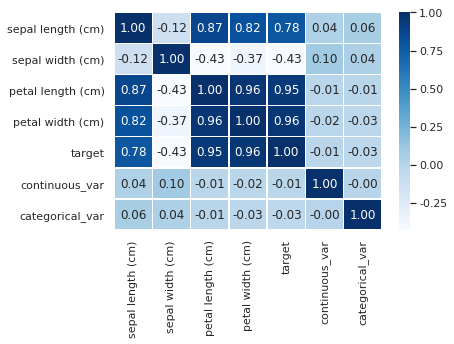

In [93]:
# plt.figure(figsize=(15,15))
sns.heatmap(data3.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

## 상관관계가 낮을 때

### 평균으로 대체 (연속형 변수)

In [94]:
data3['continuous_var'] = data3['continuous_var'].fillna(data3['continuous_var'].mean())
data3.isna().sum()

sepal length (cm)     0
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
target                0
target_names          0
continuous_var        0
categorical_var      10
dtype: int64

### 최빈값으로 대체 (범주형 변수)

In [95]:
data3['categorical_var'] = data3['categorical_var'].fillna(data3['categorical_var'].mode()[0])
data3.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
continuous_var       0
categorical_var      0
dtype: int64

## 상관관계가 높을 때

### 조건대체

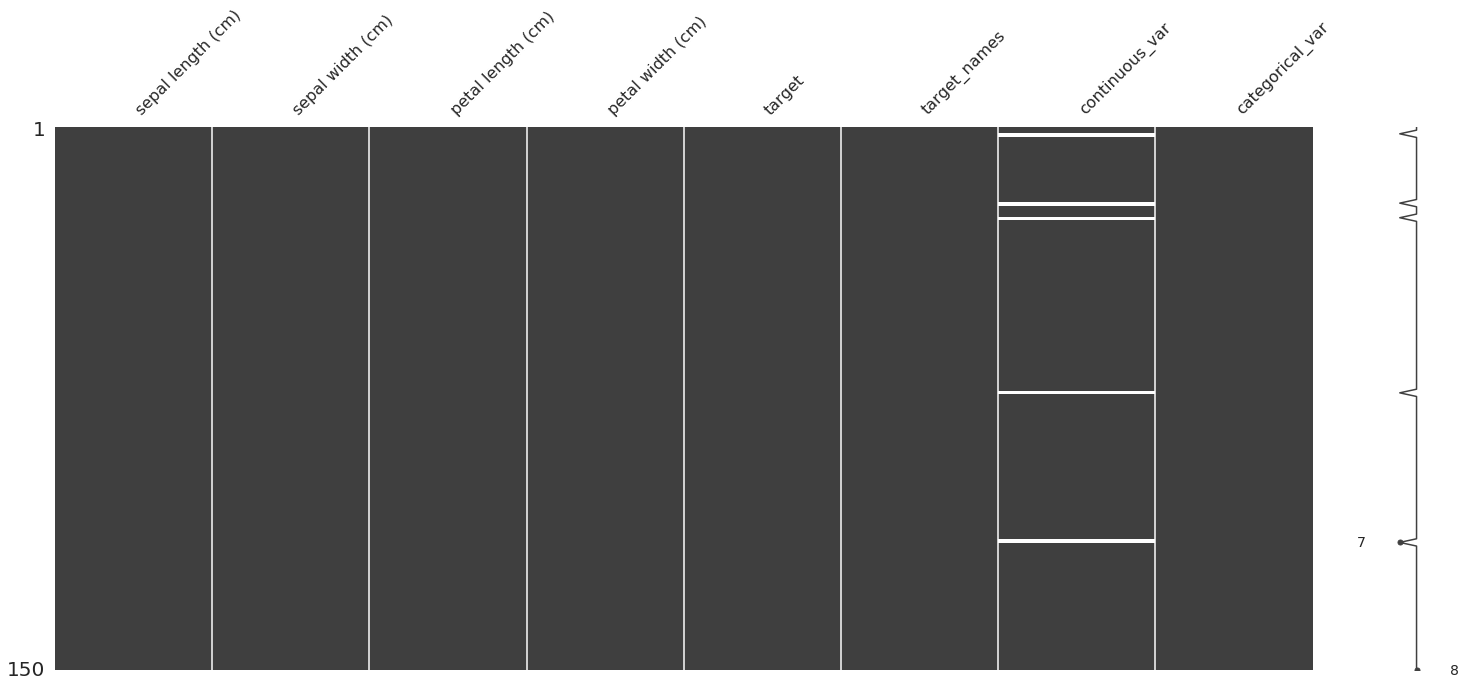

In [96]:
data4 = df.copy()

ctns = [1, 1.5, 2, 2.5, 3] * 30
random.shuffle(ctns)
ctns = np.array(data4['sepal length (cm)']) + np.array(ctns)
data4['continuous_var'] = ctns

ctgr = data4['petal length (cm)'] + data4['petal width (cm)']
bins = (0, 2, 4, 6, 20)
group_names = ['S', 'X', 'L', 'XL']

# 연속형 변수를 범주화할 때 사용
categories = pd.cut(ctgr, bins, labels=group_names)

data4['categorical_var'] = categories

sample = data4.sample(n=5).index
data4.iloc[sample, 6] = np.nan
msno.matrix(data4)

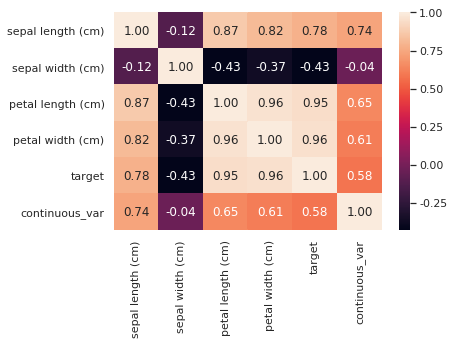

In [97]:
sns.heatmap(data4.corr(), annot=True, fmt='.2f')

In [98]:
data4.continuous_var = data4.groupby(data4.categorical_var).continuous_var.transform(lambda x: x.fillna(x.mean()))

In [99]:
data4.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
continuous_var       0
categorical_var      0
dtype: int64

## 모델 대체

In [100]:
data4 = df.copy()

ctns = [1, 1.5, 2, 2.5, 3] * 30
random.shuffle(ctns)
ctns = np.array(data4['sepal length (cm)']) + np.array(ctns)
data4['continuous_var'] = ctns

ctgr = data4['petal length (cm)'] + data4['petal width (cm)']
bins = (0, 2, 4, 6, 20)
group_names = ['S', 'X', 'L', 'XL']

# 연속형 변수를 범주화할 때 사용
categories = pd.cut(ctgr, bins, labels=group_names)

data4['categorical_var'] = categories

In [101]:
sample = data4.sample(n=10).index
data4.iloc[sample, 7] = np.nan
data4.isna().sum()

sepal length (cm)     0
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
target                0
target_names          0
continuous_var        0
categorical_var      10
dtype: int64

In [102]:
data4.shape

(150, 8)

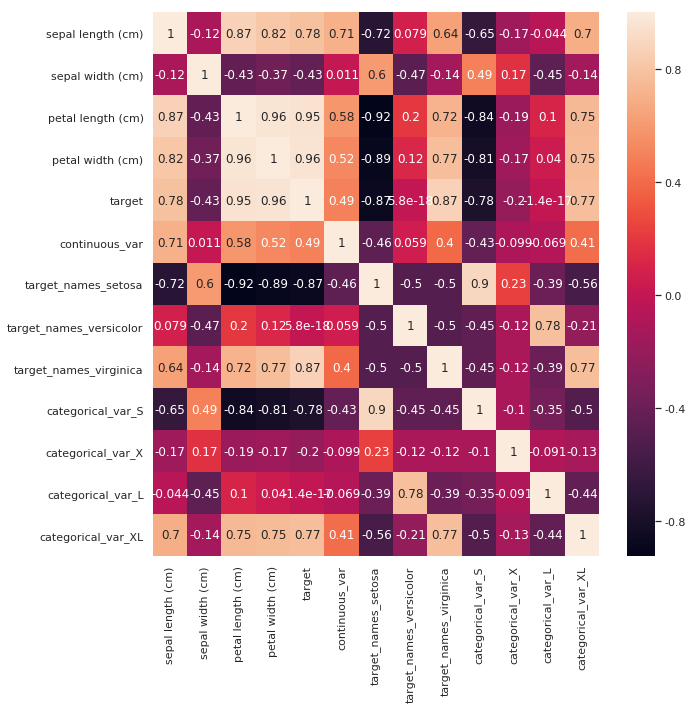

In [103]:
data5 = pd.get_dummies(data4)
plt.figure(figsize=(10, 10))
sns.heatmap(data5.corr(), annot=True,)

In [104]:
X_train = data4.dropna().drop(['categorical_var', 'target', 'target_names'], axis=1)
X_train.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),continuous_var
0,5.1,3.5,1.4,0.2,7.1


In [105]:
y_train = data4.dropna()['categorical_var']
y_train

0       S
1       S
2       S
3       S
4       S
       ..
144    XL
145    XL
147    XL
148    XL
149    XL
Name: categorical_var, Length: 140, dtype: category
Categories (4, object): ['S' < 'X' < 'L' < 'XL']

In [106]:
X_test = data4[data4['categorical_var'].isna()].drop(['categorical_var', 'target', 'target_names'], axis=1)
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),continuous_var
5,5.4,3.9,1.7,0.4,8.4
26,5.0,3.4,1.6,0.4,7.5
32,5.2,4.1,1.5,0.1,6.7
53,5.5,2.3,4.0,1.3,8.5
97,6.2,2.9,4.3,1.3,9.2
99,5.7,2.8,4.1,1.3,8.7
109,7.2,3.6,6.1,2.5,10.2
110,6.5,3.2,5.1,2.0,9.0
113,5.7,2.5,5.0,2.0,6.7
146,6.3,2.5,5.0,1.9,9.3


In [107]:
lg_param = {'C': np.logspace(-3, 3, 7), "penalty":["l1", 'l2']}
svm_param = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
knn_param = {"n_neighbors": [3,5,7,9], 'weights':["uniform", "distance"], "metric":['euclidean', 'manhattan']}

param_list = [lg_param, svm_param, knn_param]
model_list = [LogisticRegression(solver='liblinear', max_iter=10000), SVC(), KNeighborsClassifier()]
grid_list = [GridSearchCV(MODEL, param_list[i], cv=3, n_jobs=-1, verbose=5) for i, MODEL in enumerate(model_list)]

#### voing 기법

In [108]:
pred_list = []
for i, model in enumerate(grid_list):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_list = [pred]

missing_value = pd.DataFrame(pred_list).mode().T
missing_value.index = X_test.index

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [109]:
data4['categorical_var'] = data4['categorical_var'].fillna(missing_value[0])

In [110]:
data4.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
continuous_var       0
categorical_var      0
dtype: int64

# Scaling
- 스케일링 하는 이유: 변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 target에 미치는 영향령을 제대로 반영하기 어렵기 때문
- 과적합된 모델은 극도로 크거나 작은 가중치를 갖는 경향을 보임

## MinMax Scaling
- 값의 범위가 0~1 사이로 변경

#### 데이터 준비

In [111]:
numerical_df = df.drop(['target_names', 'target'], axis=1)
numerical_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [112]:
mscaler = MinMaxScaler()
mscaler.fit(numerical_df)
mscaled = mscaler.transform(numerical_df)
mscaled_df = pd.DataFrame(mscaled, columns=numerical_df.columns)
mscaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


#### scaled 값 확인 - 최소 0, 최대 1로 변환됨
- 각 열은 각각의 최대 최소로 스케일링 됨

In [113]:
print(df.min())
print()
print(mscaled_df.min())

sepal length (cm)       4.3
sepal width (cm)          2
petal length (cm)         1
petal width (cm)        0.1
target                    0
target_names         setosa
dtype: object

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64


## Standard Scaling
- z 변환. 데이터를 통계적으로 표준 정규분포화
- 데이터의 평균은 0, 표준편차는 1로 정규화 됨

In [114]:
sdscaler = StandardScaler()
sdscaler.fit(numerical_df)
sdscaled = sdscaler.transform(numerical_df)
# sdscaler.fit_transform(numerical_df) 하면 한변에 변환

In [115]:
sdscaled_df = pd.DataFrame(sdscaled, columns=numerical_df.columns)

In [116]:
print(df.min())
print()
print(sdscaled_df.min())

sepal length (cm)       4.3
sepal width (cm)          2
petal length (cm)         1
petal width (cm)        0.1
target                    0
target_names         setosa
dtype: object

sepal length (cm)   -1.870024
sepal width (cm)    -2.433947
petal length (cm)   -1.567576
petal width (cm)    -1.447076
dtype: float64


# Sampling
- 분류를 목적으로 하는 데이터셋에 클래스가 불균형인 경우, 분류 학습이 어려움
- 대표적인 sampling 함수
    - over-sampling
        - RandomOverSampler: random sampler
        - ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning
        - *SMOTE: Synthetic Minority Over-sampling Technique
            - 합성데이터를 생성하는 방식
            - 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터를 찾고, 그 사이에 새로운 데이터를 생성
            - knn이나 부트스래핑 사용
                - 장점
                    - 데이터 손실이 발생하지 않음
                    - RandomOverSampler 보다 과적합 완화
                - 단점
                    - 새로운 데이터에 대해서는 예측이 취약
    - under-sampling
        - RandomUnderSampler: random under-sampling method
        - TomekLinks: Tomek’s link method
        - CondensedNearestNeighbour: condensed nearest neighbour method
        - OneSidedSelection: under-sampling based on one-sided selection method
        - EditedNearestNeighbours: edited nearest neighbour method
        - NeighbourhoodCleaningRule: neighbourhood cleaning rule

## over-sampling & under-sampling
- 가장 쉬운 샘플링 기법
- 무작위로 데이터를 선택하고
    - 복제하면 over-sampling 많은 class 데이터 개수에 맞춤
    - 제거하면 under-sampling. 적은 class 데이터 개수에 맞춤
- 문제점
    - 복제하는 경우, 똑같은 데이터가 생성되므로 과적합 발생하기 쉬워짐
    - 제거하는 경우, 데이터의 정보량이 손실    

In [117]:
iris = df.drop('target_names', axis=1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [118]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop('target', axis=1), iris['target'], train_size=0.8)
# train, test = train_test_split(iris)

#### 기존 class 개수

In [119]:
y_train.value_counts()

2    43
1    40
0    37
Name: target, dtype: int64

#### 오버샘플링 후 클래스 개수

In [120]:
ros = RandomOverSampler(random_state=2019)
oversampled_data, oversampled_label = ros.fit_resample(X_train, y_train)
oversampled_df = pd.DataFrame(oversampled_data, columns=X_train.columns)
# pd.get_dummies(oversampled_label).sum()
oversampled_label.value_counts()

2    43
1    43
0    43
Name: target, dtype: int64

#### 언더샘플링 후 클래스 개수

In [121]:
rus = RandomUnderSampler(random_state=2019)
undersampled_data, undersampled_label = rus.fit_resample(X_train, y_train)
undersampled_df = pd.DataFrame(undersampled_data, columns=X_train.columns)
# pd.get_dummies(undersampled_label).sum()
undersampled_label.value_counts()

2    37
1    37
0    37
Name: target, dtype: int64

In [122]:
smote = SMOTE(k_neighbors=5, random_state=2019)
smoted_data, smoted_label = smote.fit_resample(X_train, y_train)
smoted_data_df = pd.DataFrame(smoted_data, columns=smoted_data.columns)
smoted_label_df = pd.DataFrame(smoted_label, columns=["target"])

In [123]:
smoted_label.value_counts()

2    43
1    43
0    43
Name: target, dtype: int64

## 분류 모델을 통해 결과 비교

In [124]:
def train_and_test(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, pred) * 100, 2)
    return accuracy

In [125]:
print("original data accuracy: ", train_and_test(SVC(), X_train, X_test, y_train, y_test))
print("over-sampling data accuracy: ", train_and_test(SVC(), oversampled_data, X_test, oversampled_label, y_test))
print("under-sampling data accuracy: ", train_and_test(SVC(), undersampled_data, X_test, undersampled_label, y_test))
print("SMOTE data accuracy: ", train_and_test(SVC(), smoted_data, X_test, smoted_label, y_test))

original data accuracy:  93.33
over-sampling data accuracy:  93.33
under-sampling data accuracy:  93.33
SMOTE data accuracy:  93.33


# PCA
- 여러 차원으로 이루어지 데이터를 가장 잘 표현하는 축 찾는 것
    - 데이터를 잘 표현한다 = 분산이 넓은 축
    - Principal Component (PC, 주성분): 데이터에서 특이값 분해를 통해 추출된 고유벡터
    - 각 고유벡터는 서로 직교
        - 단점: 주성분이 어떤 컬럼인지 알 수 없음
- 과정
    - 각 컬럼들의 값의 범위를 평균과 표준편차를 사용해 정규화
    - 데이터들의 공분산을 계산
    - 공분산 행렬에 대해 특이값 분해를 수행하여 주성분(고유벡터)과 고유값 계산
    - 고유값의 크기와 비율을 보고 몇 개의 주성분을 선택할지 선택
    - 선택한 주성분으로 모든 데이터를 projection 시킴으로서 차원을 축소

### CAUTION
- PCA는 데이터셋의 평균이 0이라고 가정
- 그렇기 때문에 데이터를 원점에 맞추는 것을 잊지말아야함

In [126]:
digits = load_digits()
data = digits.data
label = digits.target

pca = PCA()
# new_data = pca.fit_transform(data)
pca.fit(data)
new_data = pca.transform(data)

#### 주성분 2개로 전체 데이터 표현

before dimension:  (1797, 64)
after dimension:  (1797, 2)


Text(0, 0.5, 'component 2')

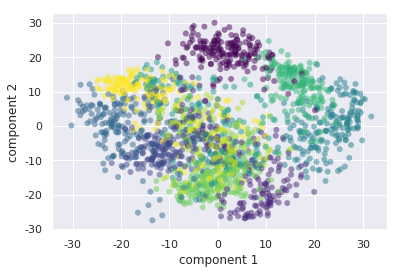

In [127]:
pca2 = PCA(n_components=2)
new_data2 = pca2.fit_transform(data)

print("before dimension: ", data.shape)
print("after dimension: ", new_data2.shape)

plt.scatter(new_data2[:, 0],
            new_data2[:, 1], 
            c=label, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')

## component 개수 선택

0.95 이상이 되는 componet 수:  29


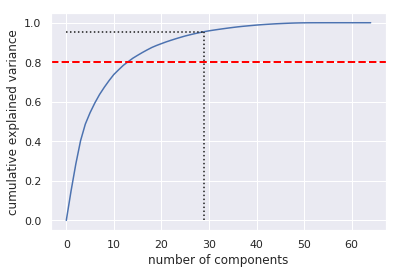

In [128]:
digits = load_digits()
data = digits.data
label = digits.target

pca = PCA()
# new_data = pca.fit_transform(data)
pca.fit(data)
new_data = pca.transform(data)
# 0을 추가해야 0 component라는 의미
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum = np.append([0], cumsum)
d = np.argmax(cumsum >= 0.95)
print("0.95 이상이 되는 componet 수: ", d)
plt.plot(np.arange(len(cumsum)), cumsum)
plt.plot([d, d], [0, cumsum[d]], "k:")
plt.plot([0, d], [cumsum[d], cumsum[d]], "k:")

plt.axhline(0.8, 0, len(pca.components_), c='red', linestyle='--', linewidth=2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
# plt.xlim([0, len(cumsum)-1])
# plt.ylim([0, 1.04])
# # plt.gca().set_xlim(left=0)
# # plt.gca().set_ylim(bottom=0)
# plt.xlim(0)
# plt.ylim(0)

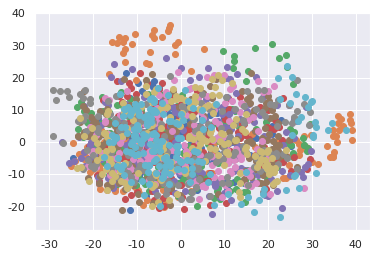

In [129]:
def show_pca(all_data, label, target):
    _data = all_data[label==target]
    pca = PCA(n_components=2)
    pca.fit(_data)
    transfomred = pca.transform(_data)
    plt.scatter(transfomred[:, 0], transfomred[:, 1]);
#     plt.axis()
#     plt.gca().set_aspect("scaled")
#     plt.gca().set_aspect("equal")
    
for i in range(10):
    show_pca(data, label, i)

### 압축을 위한 PCA

In [130]:
pca = PCA(n_components=29)
reduced = pca.fit_transform(data)
reduced.shape

(1797, 29)

In [131]:
recovered = pca.inverse_transform(reduced)
recovered.shape

(1797, 64)

In [132]:
def plot_digits(instances, images_per_row=5, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

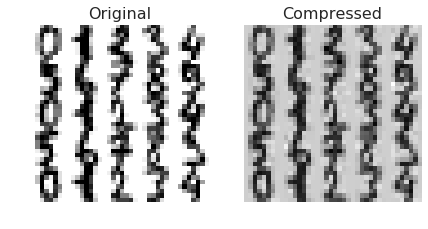

In [133]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(data[:25])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(recovered[:25])
plt.title("Compressed", fontsize=16)

# save_fig("mnist_compression_plot")

# categorical variable

## label encoding
- n개의 범주형 데이터를 0~n의 연속적인 수치 데이터로 표현

In [134]:
cat_var = [
    ['yellow', 'M', '23', 'a'],
    ['red', 'L', '26', 'b'],
    ['blue', 'XL', '20', 'c']
]

In [135]:
df = pd.DataFrame(data=cat_var, columns=['color', 'size', 'price', 'type'])
df

,color,size,price,type
0,yellow,M,23,a
1,red,L,26,b
2,blue,XL,20,c


In [136]:
x = df.values
shop_le = LabelEncoder()

In [137]:
shop_le.fit_transform(x[:, 0])

array([2, 1, 0])

In [138]:
shop_le.fit_transform(x[:, 1])

array([1, 0, 2])

In [139]:
# 3번째 열은 숫자이므로 그냥 숫자처리
# shop_le.fit_transform(x[:, 2])
x[:, 2].astype(float)

array([23., 26., 20.])

In [140]:
shop_le.fit_transform(x[:, 3])

array([0, 1, 2])

## One-hot Encoding

In [141]:
pd.get_dummies(df)

,color_blue,color_red,color_yellow,size_L,size_M,size_XL,price_20,price_23,price_26,type_a,type_b,type_c
0,0,0,1,0,1,0,0,1,0,1,0,0
1,0,1,0,1,0,0,0,0,1,0,1,0
2,1,0,0,0,0,1,1,0,0,0,0,1


# Outlier

In [142]:
df = pd.DataFrame([
    [2,1,3],
    [3,2,5],
    [3,4,7],
    [3, 60, 7],
    [5, 5, 10],
    [7, 5, 12],
    [2, 5, 7],
    [9, 2, 13]
], columns=['hours', 'attendance', 'exam_score'])

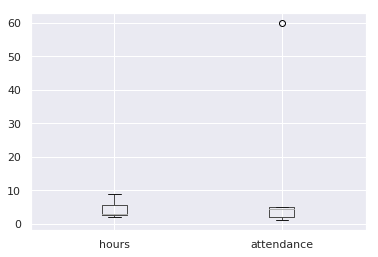

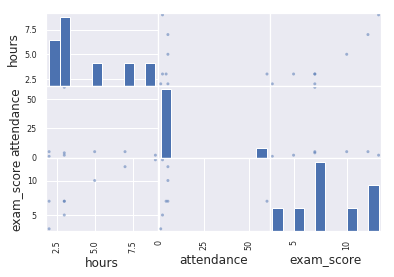

In [143]:
df.boxplot(column=['hours', 'attendance'])
plt.show()
pd.plotting.scatter_matrix(df);
plt.show()

In [144]:
df

,hours,attendance,exam_score
0,2,1,3
1,3,2,5
2,3,4,7
3,3,60,7
4,5,5,10
5,7,5,12
6,2,5,7
7,9,2,13


#### 이상치 제거

In [145]:
df.drop(df[df['exam_score'] > 10].index)

,hours,attendance,exam_score
0,2,1,3
1,3,2,5
2,3,4,7
3,3,60,7
4,5,5,10
6,2,5,7


#### loc 이용해서 특정값으로 대치

In [146]:
df.loc[df['attendance'] > 20, ['attendance']] = 20
df

,hours,attendance,exam_score
0,2,1,3
1,3,2,5
2,3,4,7
3,3,20,7
4,5,5,10
5,7,5,12
6,2,5,7
7,9,2,13


# Ensemble

## Voting
- 동일한 데이터에 대해서 여러 분류기를 생성
- 예측한 결과를 기반으로 투표하여 최종 예측 결과 선정


- hard voting
    - 모든 분류기의 결과를 집계하여 가장 많이 예측된 클래스를 최종적으로 예측한 클래스로 반환
    
- soft voting
    - 모든 분류기의 예측 확률을 집계하여, 각 예측 확률의 평균을 내어 더 높은 확률의 클래스를 최종 선택

In [147]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data_df, cancer.target, test_size=0.2, random_state=156)

In [148]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=8)

In [149]:
# default is hard voting
vo_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn)], voting='soft', n_jobs=-1)

In [150]:
vo_clf.fit(X_train, y_train, )

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 solver='liblinear')),
                             ('knn', KNeighborsClassifier(n_neighbors=8))],
                 n_jobs=-1, voting='soft')

In [151]:
pred = vo_clf.predict(X_test)
print("Voting accuracy: {}".format(accuracy_score(y_test, pred)))

Voting accuracy: 0.956140350877193


### 여러 개의 분류기를 결합한다고 해서 항상 성능이 향상되는 것은 아님

In [152]:
clfs = [lr, knn]
for _clf in clfs:
    _clf.fit(X_train, y_train)
    pred = _clf.predict(X_test)
    class_name = _clf.__class__.__name__
    _accuracy = accuracy_score(y_test, pred)
    print("{0} -> Accuracy: {1:.4f}".format(class_name, _accuracy))

LogisticRegression -> Accuracy: 0.9474
KNeighborsClassifier -> Accuracy: 0.9386


## Bagging (Bootstrap Aggregating)
- 훈련용 데이터 집합으로부터 크기가 같은 표본을 여러 번 단순확률 반복추출. 중복 값이 포함될 수 있음 (부트스트래핑)
- 각각에 대한 분류기를 생성
- 생성된 분류기들의 결과를 종합하여 의사결정

장점
- 전체 데이터를 여러 번 복원추출하여 다수의 샘플 데이터를 대상으로 분류기를 실행하기 때문에 정확도 향상<br>

단점
- 표본 데이터가 작은 경우 그 표본 데이터가 전체 데이터를 반영하지 못함
- 데이터에 노이즈가 많은 경우 특이점이 추정을 크게 왜곡 시킬 수 있음

### RandomForest


- 과정
    - 데이터로부터 부트스트랩 샘플 구성
    - 부트스트랩 데이터로 결정트리를 만듬
        - 이 때의 각각 결정트리는 전체 특성이 아닌 무작위로 후보 특성들을 선택하여 이것들로 최선의 테스트를 찾음
        - 각 트리가 몇 개의 특성을 고를지는 `max_features`를 매개변수로 조정 가능
        - `max_features`가 데이터의 `n_features`와 동일하면 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않음
            - `max_features`가 크면, 다른 트리들이 매우 비슷해짐
            - 작으면, 랜덤 포레스트 트리들이 달라지지만 그만큼 깊이가 깊어짐
            
    - regression 시, 각 트리의 결과값의 평균 반환
    - classification 시, soft voting을 이용. 각 트리의 예측 확률의 평균들을 비교하여 큰 쪽의 클래스를 반환
    
    
- 기본 설정으로도 좋은 결과를 만들어줄 때가 많음
- 일반적으로 랜덤포레스트에서의 `feature_importances_`가 단일 트리의 특성중요도 보다 더 신뢰할만함
- `n_estimators`, `max_features`가 중요한 매개변수
- `n_estimators`가 크면 과대적합을 줄여 안정적인 모델을 만들 수 있으나, 시간이 오래 걸릴 수 있음

- 장점
    - 하이퍼파라미터 튜닝을 하지 않아도 잘 작동
    - 데이터의 스케일을 맞출 필요 없음

- 단점
    - 의사결정 과정을 최소화 해야한다면 단일 트리가 나음. 랜덤포레스트 내 수백개의 트리를 자세히 분석하기 어렵고 트리가 깊어지기 때문
    - 시간이 많이 걸릴 수 있음. `n_jobs=-1`로 해결
    - random_state를 지정하지 않으면 전혀 다른 모델이 됨
    - 텍스트 데이터와 같은 차원이 높고 희소한 데이터에서는 잘 작동하지 않음. -> 이럴 떈 선형모델이 나음

In [153]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data_df, cancer.target, test_size=0.2, random_state=156)

In [154]:
params = {
    'n_estimators':[300],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

# grid serach 할 때, random_state 주의
rf_clf = RandomForestClassifier(random_state=0)

In [155]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1, verbose=5)
grid_cv.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [300]},
             verbose=5)

In [156]:
grid_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 300}

In [157]:
grid_cv.best_score_

0.9472718138959735

In [158]:
grid_cv.estimator

RandomForestClassifier(random_state=0)

In [159]:
# grid serach 후, random_state 통일
best_rf_clf = RandomForestClassifier(
    n_estimators=grid_cv.best_params_['n_estimators'],
    max_depth=grid_cv.best_params_['max_depth'], 
    min_samples_leaf=grid_cv.best_params_['min_samples_leaf'],
    min_samples_split=grid_cv.best_params_['min_samples_split'],
    random_state=0
)
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=300, random_state=0)

In [160]:
pred = best_rf_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

In [161]:
rf_importances = pd.Series(best_rf_clf.feature_importances_, index=cancer.feature_names)
rf_top20 = rf_importances.sort_values(ascending=False)[:20]

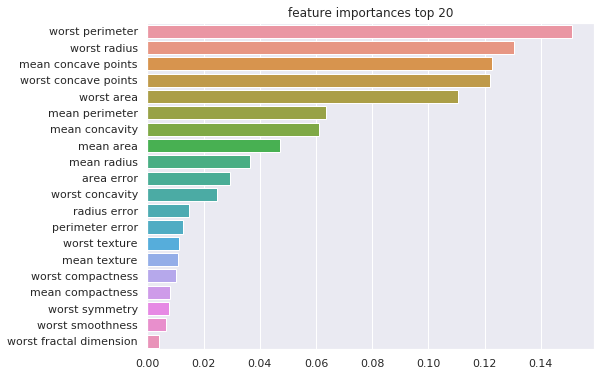

In [162]:
plt.figure(figsize=(8, 6))
plt.title("feature importances top 20")
sns.barplot(x=rf_top20.values, y=rf_top20.index)

#### grid_cv.best_estimator_를 이용한 결과 시각화

In [163]:
grid_cv.best_estimator_.fit(X_train, y_train)
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

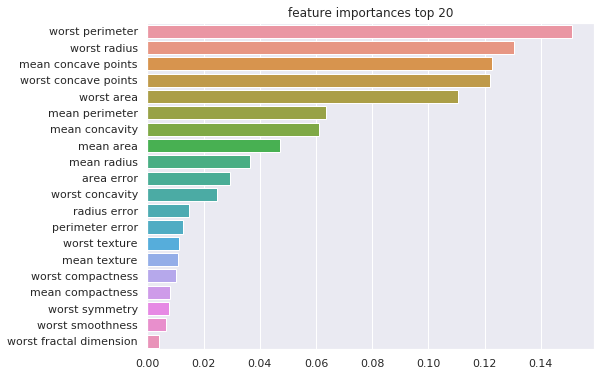

In [164]:
rf_importances = pd.Series(grid_cv.best_estimator_.feature_importances_, index=cancer.feature_names)
rf_top20 = rf_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title("feature importances top 20")
sns.barplot(x=rf_top20.values, y=rf_top20.index)

### BaggingClassifier - 다른 모델을 bagging

In [165]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

## Boosting
- 초기 샘플 데이터를 조작하여 다수의 분류기를 생성하는 기법 중 하나
- 배깅과는 달리 순차적 방법
- 이전 분류기의 학습 결과를 토대로 다음 분류기의 학습 데이터의 새믈 가중치를 조장하여 학습 진행<br>

장점
    - 노이즈가 없는 데이터에 대해서는 매우 우수<br>

단점
    - 과적합 문제로부터 자유롭지 못함

### Gradinet Boosting Machine
- AdaBoost와 유사하나, 가중치 업데이트를 경사하강법을 이용
- h(x) = y - F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 업데이트

In [166]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data_df, cancer.target, test_size=0.2, random_state=156)

In [167]:
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1]
}

In [168]:
gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, n_jobs=-1, verbose=5)
grid_cv.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 200]},
             verbose=5)

In [169]:
grid_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [170]:
grid_cv.best_estimator_

GradientBoostingClassifier(n_estimators=200, random_state=0)

In [171]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_accuracy

0.9736842105263158

### XGBoost
- 앙상블 학습에서 가장 각광받고 있는 알고리즘

- 결측값 자체 처리
- GBM 대비 빠른 수행시간: 순차적으로 가중치를 증감하는 방법
- 자체 내장된 교차검증: 매 반복마다 내부적으로 최적화된 반복 수행
- 과적합규제(Regularization)
    - 자체 과적합 규제 가능
- 가지치기(Pruning)
    - GBM은 분할시 부정손실이 발생하면 분할 수행 중단. 많은 분할 발생
    - XGBoost는 max_depth 파라미터로 분할 깊이 조정 및 분할 수를 줄이는 것이 장점

#### eval dataset도 준비해야함

In [172]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data_df, cancer.target, test_size=0.2, random_state=156)
X_train, V_test, y_train, v_test = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

In [173]:
xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)

In [174]:
evals = [(V_test, v_test)]

# class > 2, mlogloss (multi-class logloss)
xgb_wrapper.fit(
    X_train, y_train,
    early_stopping_rounds=100, 
    eval_set=evals,
    eval_metric='logloss',
    verbose=False
)

XGBClassifier(n_estimators=300)

In [175]:
xgb_pred = xgb_wrapper.predict(X_test)
accuracy_score(xgb_pred, y_test)

0.956140350877193

In [176]:
xgb_pred = xgb_wrapper.predict(V_test)
accuracy_score(xgb_pred, v_test)

0.945054945054945

### LightGBM
- 더 빠른 학습과 예측 수행시간
- 더 작은 메모리 사용량
- categorical feature의 자동변환과 최적분할

#### eval dataset도 준비해야함

In [177]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data_df, cancer.target, test_size=0.2, random_state=156)
X_train, V_test, y_train, v_test = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

In [178]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

In [179]:
evals = [(V_test, v_test)]
lgbm_wrapper.fit(
    X_train, y_train,
    early_stopping_rounds=100,
    eval_metric='logloss',
    eval_set=evals,
    verbose=0
)

LGBMClassifier(n_estimators=400)

In [180]:
lgbm_pred = lgbm_wrapper.predict(X_test)
accuracy_score(y_test, lgbm_pred)

0.9385964912280702

In [181]:
lgbm_wrapper.feature_importances_

array([13, 46,  6,  2, 11,  6, 20, 36,  1,  6, 11, 47,  7, 26, 10,  6,  5,
       12,  5, 16, 20, 28, 33, 18, 30, 12, 27, 27, 18, 12])

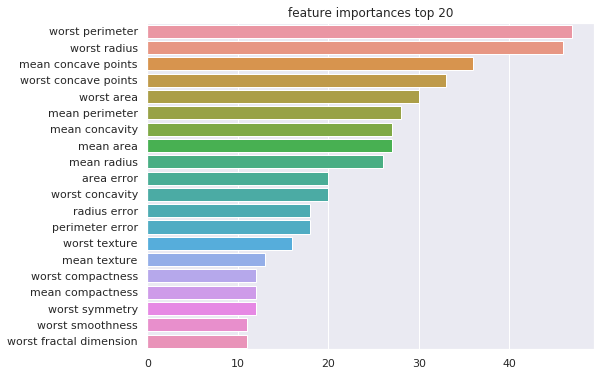

In [182]:
lgbm_importances = pd.Series(lgbm_wrapper.feature_importances_, index=cancer.feature_names)
lgbm_top20 = lgbm_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title("feature importances top 20")
sns.barplot(x=lgbm_top20.values, y=rf_top20.index)